In [1]:
from ca_utils import *
from shapely.geometry import Point, Polygon, MultiPoint
import matplotlib.pyplot as plt

In [2]:
object_1 = moving_object(0,0,0,type="Tractor",rel_x_start=0,rel_y_start=0)
object_2 = moving_object(0,0,1,type="Cow",rel_x_start=80,rel_y_start=20)
time.sleep(1)
object_1.update_position_local(20,10)
object_2.update_position_local(100,0)
print((object_1.heading*(180/math.pi)),(object_2.heading*(180/math.pi)))

63.43494882292201 135.0


In [3]:
object_1.update_safety_rectangle()
object_2.update_safety_rectangle()
object_1.update_direction_lines()
object_2.update_direction_lines()
res = collision_state(object_1,object_2)
cl = res[0]

63.43495 63.43495
-45.0 135.0
No collision


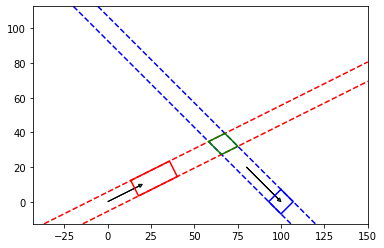

In [4]:
## things to plot
# object 1 safety rect + center point
# object 2 safety rect + center point
# collision area
plt.axis('equal')
polygon1 = Polygon(object_1.vertices)
x1,y1 = polygon1.exterior.xy

polygon2 = Polygon(object_2.vertices)
x2,y2 = polygon2.exterior.xy

polygon3 = Polygon(cl)
x3,y3 = polygon3.exterior.xy

if object_2.r_l.m == float('inf'):
    plt.axvline(x = object_2.r_l.q, color="blue", linestyle="--")
else:
    plt.axline((0,object_2.r_l.q),slope=object_2.r_l.m,color="blue", linestyle="--")

if object_2.r_r.m == float('inf'):
    plt.axvline(x = object_2.r_r.q, color="blue", linestyle="--")
else:
    plt.axline((0,object_2.r_r.q),slope=object_2.r_r.m,color="blue", linestyle="--")

if object_1.r_l.m == float('inf'):
    plt.axvline(x = object_1.r_l.q, color="red", linestyle="--")
else:
    plt.axline((0,object_1.r_l.q),slope=object_1.r_l.m,color="red", linestyle="--")

if object_1.r_r.m == float('inf'):
    plt.axvline(x = object_1.r_r.q, color="red", linestyle="--")
else:
    plt.axline((0,object_1.r_r.q),slope=object_1.r_r.m,color="red", linestyle="--")

plt.arrow(object_1.xy_prev.x,object_1.xy_prev.y,(object_1.xy.x-object_1.xy_prev.x),(object_1.xy.y-object_1.xy_prev.y),length_includes_head=True,head_width=2, head_length=2)
plt.arrow(object_2.xy_prev.x,object_2.xy_prev.y,(object_2.xy.x-object_2.xy_prev.x),(object_2.xy.y-object_2.xy_prev.y),length_includes_head=True,head_width=2, head_length=2)

plt.plot(x1,y1, c="red")
plt.plot(x2,y2,c="blue")
plt.plot(x3,y3,c="green")
